# YWBAT 
* find the optimal number of neighbors for a model using gridsearchcv
* pick the best metric for your model using gridsearchcv

# KNN 
Pros
* very simple
* easy to adjust the number of neighbors that are being used
* no assumptions about the data
* works for both regression and classification
* train time ~ 0.000s

Cons
* not good with large datasets or wide datasets
    * O(n^n)
    * big O is exponential
    * high time complexity of distance computations
* predictions can be highly variant depending on K
* very sensitive to training data
* test time is very large
* if K is large underfitting, but if K is small might get overfitting

In [25]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, make_scorer, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
import plotly
import plotly.graph_objects as go

In [9]:
df = pd.read_csv("../data/bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
yes_no_func = lambda x: 1 if x.lower() == 'yes' else 0

In [11]:
for col in ['default', 'loan', 'housing']:
    new_col = '_'.join([col, 'encoded'])
    df[new_col] = df[col].apply(yes_no_func)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,default_encoded,loan_encoded,housing_encoded
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,0,0


In [12]:
features_to_use = ['age', 'balance', 'duration', 'loan_encoded']

In [15]:
df_train, df_validation = train_test_split(df, test_size=.10)

In [16]:
X = df_train[features_to_use]
y = df_train['y']

In [17]:
knn = KNeighborsClassifier()
"""
n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
"""

"\nn_neighbors=5,\n    weights='uniform',\n    algorithm='auto',\n    leaf_size=30,\n    p=2,\n    metric='minkowski',\n    metric_params=None,\n    n_jobs=None,\n    **kwargs,\n"

In [18]:
param_grid = {
    "n_neighbors": range(3, 12, 2), # 3, 5, 7, 9, 11: 5
    "p": [1, 2, 3, 4], # 1 ,2, 3, 4: 4
    "weights": ['uniform', 'distance'] # 2: 2
}

# 5*4*2 = 40 different models
# 40 different models * 8 different splits = 320 different fits

In [19]:
gscv = GridSearchCV(knn, param_grid=param_grid, cv=8, scoring='accuracy', 
                    verbose=2, return_train_score=True, n_jobs=-1)

In [20]:
gscv.fit(X, y)

Fitting 8 folds for each of 40 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.0min finished


GridSearchCV(cv=8, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(3, 12, 2), 'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [21]:
knn_highest_accuracy = gscv.best_estimator_
knn_highest_accuracy

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=4,
                     weights='uniform')

In [22]:
knn_highest_accuracy.score(X, y)

0.8944677922780112

In [23]:
X_validation = df_validation[features_to_use]
y_validation = df_validation['y']

In [24]:
knn_highest_accuracy.score(X_validation, y_validation)

0.885891198584697

In [61]:
def plot_confusion(ytrue, ypred):
    cm_norm = confusion_matrix(ytrue, ypred, normalize='true')
    sns.heatmap(cm_norm, cmap=sns.color_palette('Blues'), fmt='0.5g', annot=True, annot_kws={"va":"bottom"})
    cm = confusion_matrix(ytrue, ypred)
    sns.heatmap(cm, cmap=sns.color_palette('Blues'), fmt='0.5g', annot=True, annot_kws={"va":"top"})
    plt.show()

In [30]:
y_validation_preds = knn_highest_accuracy.predict(X_validation)

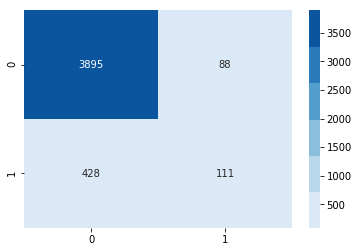

In [31]:
plot_confusion(y_validation, y_validation_preds)

# Evaluation Metrics
![](https://i.stack.imgur.com/U0hjG.png)

## When is precision better?
(I never wanna label something a 1 (positive) unless I'm more than fairly certain)
* cancer diagnosis
* criminal court proceedings
* loan approval
* high stakes situations generally


## When is recall better?
(I would rather label something a 1 (positive) than a 0, even if I'm not certain/better safe than sorry)
* cancer diagnosis
* tinder matching
* credit card fraud
* business leads

# In our case what should we use?
* if resources are limited - precision
* better to try and fail than not try at all - recall
* exploring is more important - recall

We decide on **recall**

In [36]:
y_enc = y.apply(lambda x: 1 if x.lower() == "yes" else 0)

In [34]:
gscv_recall = GridSearchCV(knn, param_grid=param_grid, cv=8, scoring=make_scorer(recall_score), 
                    verbose=2, return_train_score=True, n_jobs=-1)

In [37]:
gscv_recall.fit(X, y_enc)

Fitting 8 folds for each of 40 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.8min finished


GridSearchCV(cv=8, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(3, 12, 2), 'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(recall_score), verbose=2)

In [38]:
best_knn_recall = gscv_recall.best_estimator_

In [39]:
y_validation_preds = best_knn_recall.predict(X_validation)

In [40]:
y_valid_enc = y_validation.apply(lambda x: 1 if x.lower()=="yes" else 0)

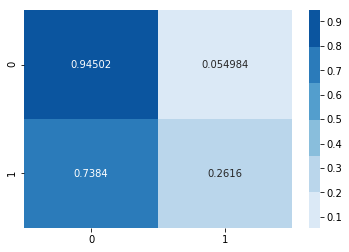

In [45]:
plot_confusion(y_valid_enc, y_validation_preds)

In [52]:
thresholds = np.linspace(0.2, 0.8, 10)
recall_scores = []
for threshold in thresholds:
    y_train_probs = best_knn_recall.predict_proba(X)[:, 1]
    labels = [1 if prob>threshold else 0 for prob in y_train_probs]
    recall = recall_score(y_enc, labels)
    recall_scores.append((threshold, recall, labels))

In [53]:
sorted_recall_scores = sorted(recall_scores, key=lambda x: x[1], reverse=True)

In [54]:
best_labels = sorted_recall_scores[0][2]

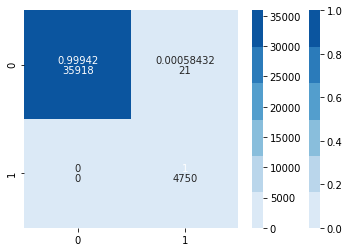

In [62]:
plot_confusion(y_enc, best_labels)

In [64]:
threshold_best = sorted_recall_scores[0][0]
threshold_best

0.2

# How do we get our validation labels with the threshold of 0.2?

In [68]:
y_validation_probs = best_knn_recall.predict_proba(X_validation)
y_validation_labels = [1 if p > threshold_best else 0 for p in y_validation_probs[:, 1]]

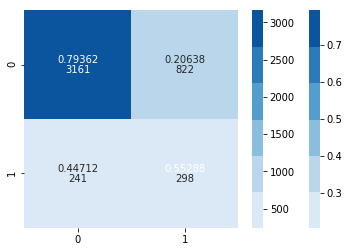

In [69]:
plot_confusion(y_valid_enc, y_validation_labels)

# What did we learn?
* how to use gridsearchcv
* when in doubt smote
* best cases to use precision v recall
* never sleep on the confusion matrices 
* that i need to download aText asap
* pros and cons of KNN
* how to identify which metric to use in modeling
* aligning values on confusion matrix
* make_scorer and how to do gridsearchcv
* precision/accuracy/recall - how to describe what they are measuring

# Questions
* is there a flowchart or something similar to approach how to analyze datasets
* if we want to tweak the threshold should we use recall in the gridsearch?
* can we pass in a threshold as a parameter in the gridsearch...maybe?